# Dataset Selection and Information

I chose to work with the **Human Activity Recognition Using Smartphones dataset** from the UCI Machine Learning Repository.

- **Dataset link**: [https://archive.ics.uci.edu/dataset/240/human+activity+recognition+using+smartphones](https://archive.ics.uci.edu/dataset/240/human+activity+recognition+using+smartphones)
- **Instances**: 10,299
- **Features**: 561 time-series features from accelerometer and gyroscope signals
- **Target**: Multiclass classification (6 activities)
  - `WALKING`
  - `WALKING_UPSTAIRS`
  - `WALKING_DOWNSTAIRS`
  - `SITTING`
  - `STANDING`
  - `LAYING`

## Why Sequence Models?

This dataset contains time-series sensor data collected from smartphones worn by individuals while performing various activites of daily living (ADL's). The temporal relationship between the readings is how we decide on the activity being performed. For example, distinguishing between "walking" and "walking upstairs" depends on how signal patterns relate to eachother over time, not just on individual measurements. Therefore, a sequence model is apropriate for this challenge.

## Chosen Framework

For this task, I will use PyTorch because it provides support for building and training sequence models with `nn.LSTM` and `nn.GRU` (see reference [1], see reference [2])



# Data Visualization and Pre-processing

The dataset comes pre-processed and conviniently structured (see reference [3]):

- Sensor signals (accelerometer and gyroscope) have already been filtered to remove noise.
- The signals are segmented into fixed width sliding windows of 2.56 seconds with 50% overlap, resulting in 128 time steps per sample.
- From each window, 561 features have been extracted based on both time and frequency domain signals (mean, standard deviation, FFT-based features).
- All features are normalized and bounded within `[-1, 1]`

The dataset is already split into:
- Training set: `train/X_train.txt`, `train/y_train.txt`, `train/subject_train.txt`
- Test set: `test/X_test.txt`, `test/y_test.txt`, `test/subject_test.txt`

## Remaining Preprocessing Tasks

We will still need to:

- Convert labels into OHE format for use in classification models (see reference [4]).
- Reshape input data to fit the expected format of PyTorch RNN layers (batch_size, sequence_length, input_size).
- Visualize class distribution to check for class imbalance.
- Create a validation set from the training data (80/20) to evaluate during training.


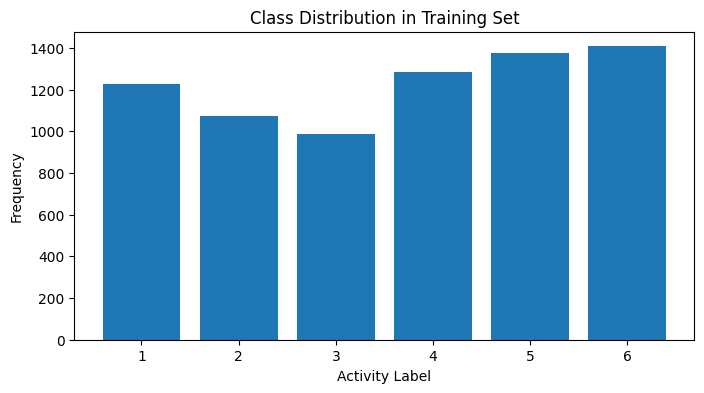

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Load the data
X_train = np.loadtxt('../data/train/X_train.txt')
y_train = np.loadtxt('../data/train/y_train.txt').astype(int)
X_test = np.loadtxt('../data/test/X_test.txt')
y_test = np.loadtxt('../data/test/y_test.txt').astype(int)

# Convert labels to OHE (see reference [4])
encoder = OneHotEncoder(sparse_output=False)
y_train_oh = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_oh = encoder.transform(y_test.reshape(-1, 1))

# Reshape input data for PyTorch
# Original shape is (n_samples, 561)
# Each sample will treated as a sequence of 1 timestep with 561 features so we dont have to do more preprocessing on the data
X_train_rnn = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_rnn = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Visualize class distribution
unique, counts = np.unique(y_train, return_counts=True)
plt.figure(figsize=(8, 4))
plt.bar(unique, counts, tick_label=[str(i) for i in unique])
plt.title('Class Distribution in Training Set')
plt.xlabel('Activity Label')
plt.ylabel('Frequency')
plt.show()

# Create validation set (80/20 split from training data)
X_train_rnn, X_val_rnn, y_train_oh, y_val_oh = train_test_split( X_train_rnn, y_train_oh, test_size=0.2, random_state=42, stratify=y_train)


## Class distribution

The class distribution appears to be fairly balanced. There should theoretically be no issues with the model prediciting entirely based on class distribution to minimize loss.

# RNN implementation 

structure
activation function ss 



## References

1. PyTorch. (n.d.). *torch.nn.LSTM — PyTorch Documentation*.  
   Retrieved from https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html

2. PyTorch. (n.d.). *torch.nn.GRU — PyTorch Documentation*.  
   Retrieved from https://pytorch.org/docs/stable/generated/torch.nn.GRU.html

3. Anguita, D., Ghio, A., Oneto, L., Parra, X., & Reyes-Ortiz, J. L. (2013). *A Public Domain Dataset for Human Activity Recognition Using Smartphones*.  
   Retrieved from https://archive.ics.uci.edu/dataset/240/human+activity+recognition+using+smartphones

4. scikit-learn. (n.d.). *OneHotEncoder — scikit-learn 1.4.2 documentation*.  
   Retrieved from https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
